Saving Weather Data Set.csv to Weather Data Set (8).csv
New Features Correlations:
 TempDiff      -0.329754
HumidityAvg    0.379889
Year          -0.014141
Month          0.007674
Name: RainTomorrow, dtype: float64
HumidityAvg Describe:
 count    145460.000000
mean         60.209980
std          17.911923
min           0.000000
25%          49.000000
50%          61.000000
75%          73.000000
max         100.000000
Name: HumidityAvg, dtype: float64


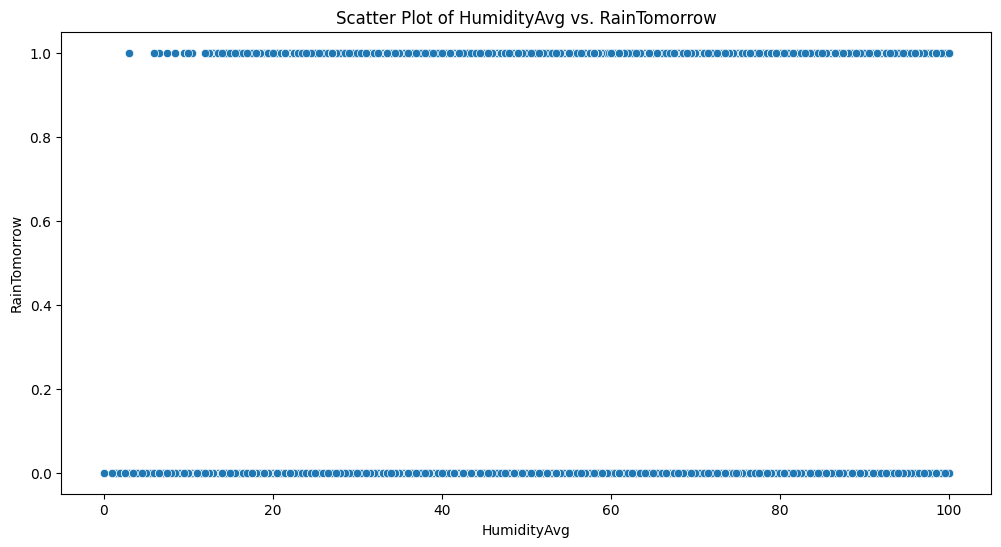

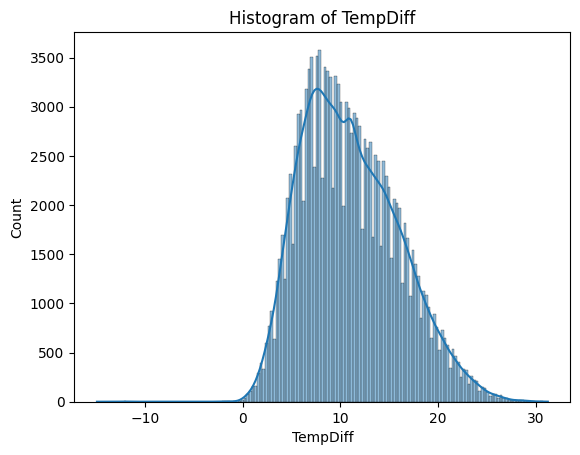

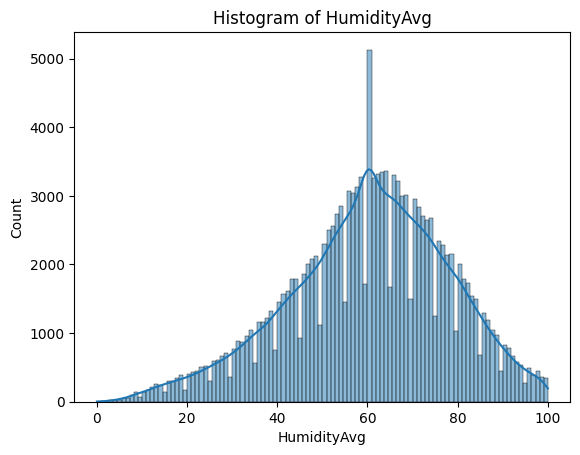

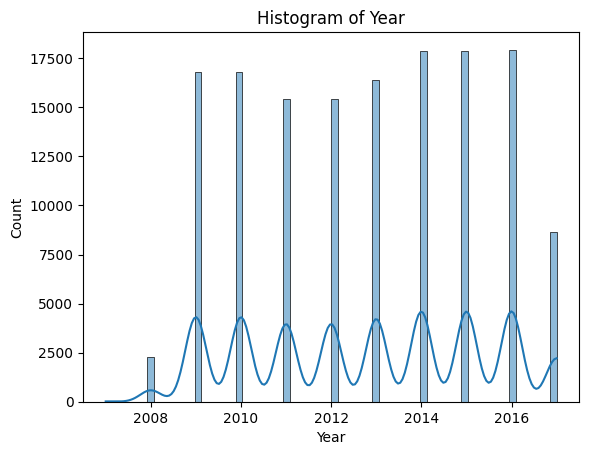

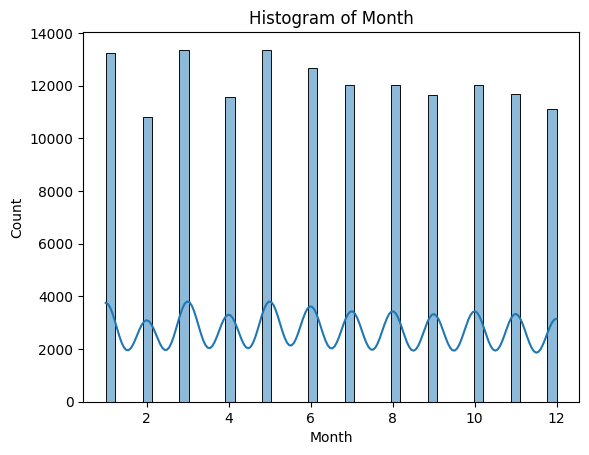

Feature engineering completed. Data saved as 'engineered_weather_data.csv'


In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Upload dataset
from google.colab import files
uploaded = files.upload()

# Load the data
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# If Date column exists as string, convert to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

# Preprocessing: Create new features
if 'MaxTemp' in df.columns and 'MinTemp' in df.columns:
    df['TempDiff'] = df['MaxTemp'] - df['MinTemp']

if 'Humidity9am' in df.columns and 'Humidity3pm' in df.columns:
    df['HumidityAvg'] = (df['Humidity9am'] + df['Humidity3pm']) / 2

if 'Date' in df.columns:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df = df.drop('Date', axis=1)  # Drop original

# EDA: Analyze new features' correlations
new_features = [col for col in ["TempDiff", 'HumidityAvg', 'Year', 'Month'] if col in df.columns]

if new_features and 'RainTomorrow' in df.columns:
    corr_new = df[new_features + ['RainTomorrow']].corr()['RainTomorrow'].drop('RainTomorrow', errors='ignore')
    print("New Features Correlations:\n", corr_new)

# Assess impact on distribution
if "HumidityAvg" in df.columns:
    print("HumidityAvg Describe:\n", df["HumidityAvg"].describe())

# Visualizations
if "HumidityAvg" in df.columns and 'RainTomorrow' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='HumidityAvg', y='RainTomorrow', data=df)
    plt.title('Scatter Plot of HumidityAvg vs. RainTomorrow')
    plt.show()

for col in new_features:
    if col in df.columns:
        sns.histplot(df[col], kde=True)
        plt.title(f'Histogram of {col}')
        plt.show()

# Save the engineered dataframe for the next member
df.to_csv('engineered_weather_data.csv', index=False)
print("Feature engineering completed. Data saved as 'engineered_weather_data.csv'")